## A.I. Assignment 4 Solution

In [234]:
import torch
import matplotlib.pyplot as plt

Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [247]:
x = torch.tensor([1.0, 2.0], requires_grad=True)

y = torch.sigmoid(x)
y.sum().backward()
grad_torch = x.grad
print(grad_torch) 

y = 1 / (1 + torch.exp(-x))
grad_formula = y * (1 - y)

print(grad_formula)

tensor([0.1966, 0.1050])
tensor([0.1966, 0.1050], grad_fn=<MulBackward0>)


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [246]:
x = torch.tensor([1.0, 2.0], requires_grad=True)

y = x
y.sum().backward()
grad_torch = x.grad
print(grad_torch) 

grad_formula = torch.ones_like(x)
print(grad_formula)

tensor([1., 1.])
tensor([1., 1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [245]:
x = torch.tensor([2.0, -1.5, 0], requires_grad=True)

y = torch.max(torch.zeros_like(x), x)
y.sum().backward()
grad_torch = x.grad
print(grad_torch)

grad_formula = torch.where(x > 0, 1.0, 0.0)
grad_formula[x == 0] = 0.5
print(grad_formula)


tensor([1.0000, 0.0000, 0.5000])
tensor([1.0000, 0.0000, 0.5000])


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

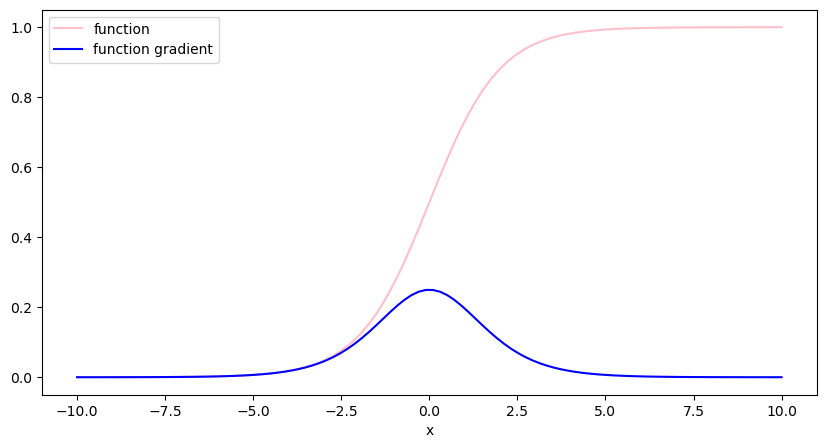

In [244]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def plot_sigmoid():
    x = torch.linspace(-10, 10, 100)
    y = sigmoid(x)
    y_grad = sigmoid_grad(x)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'pink', label='function')
    ax.plot(x, y_grad, 'blue', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()
    
plot_sigmoid()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

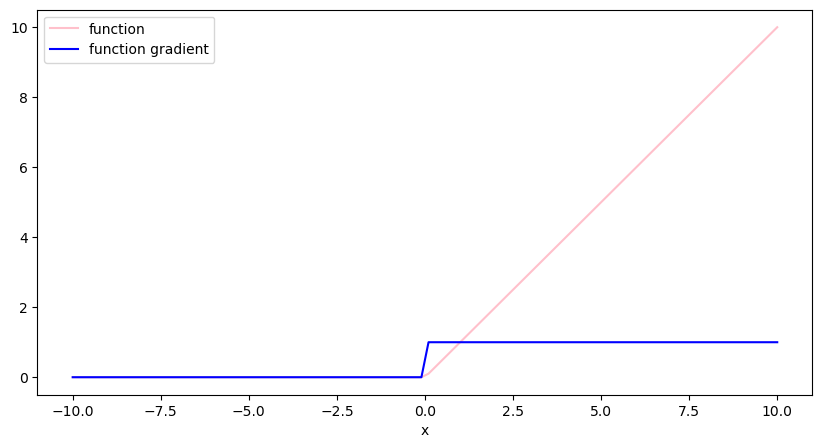

In [243]:
def relu(x):
    return torch.maximum(torch.tensor(0), x)

def relu_grad(x):
    return torch.where(x > 0, 1, 0)

def plot_relu():
    x = torch.linspace(-10, 10, 100)
    y = relu(x)
    y_grad = relu_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'pink', label='function')
    ax.plot(x, y_grad, 'blue', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()
    
plot_relu()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

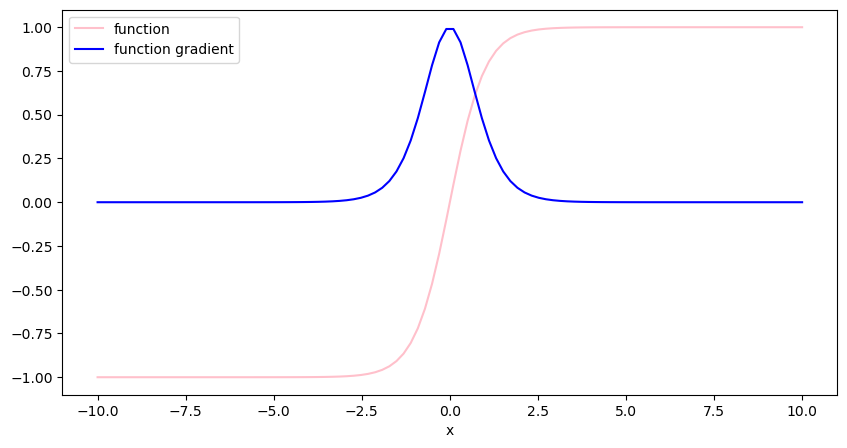

In [242]:
def tanh(x):
    return torch.tanh(x)

def tanh_grad(x):
    return 1 - torch.square(torch.tanh(x))

def plot_tanh():
    x = torch.linspace(-10, 10, 100)
    y = tanh(x)
    y_grad = tanh_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'pink',  label='function')
    ax.plot(x, y_grad, 'blue', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()

plot_tanh()

Exercise 7. 

Write in python a function to plot the softmax activation function.

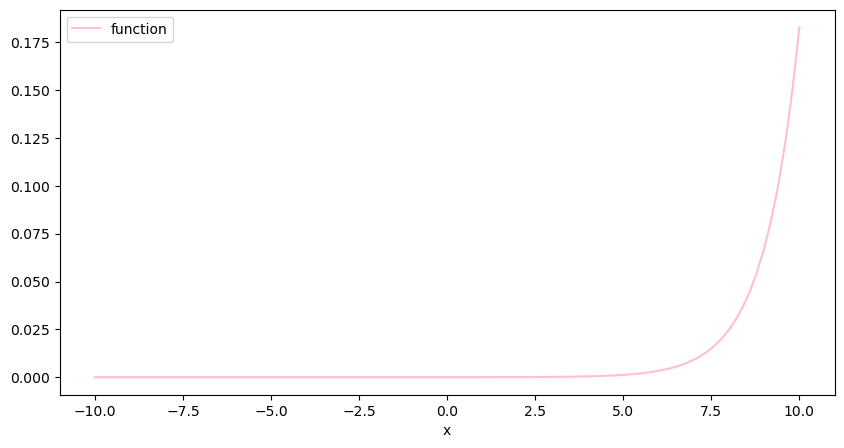

In [241]:
def softmax(x):
    e_x = torch.exp(x - torch.max(x))
    return e_x / e_x.sum()

def plot_softmax():
    x = torch.linspace(-10, 10, 100)
    y = softmax(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'pink',  label='function')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()
    
plot_softmax()

Exercise 8. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

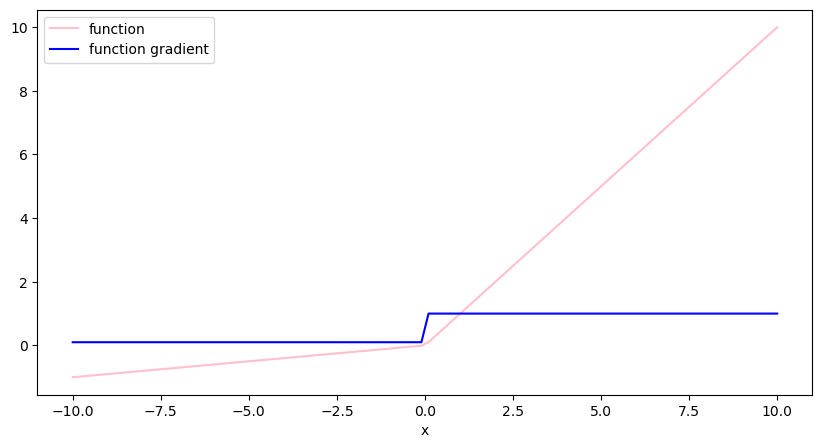

In [240]:
def leaky_relu(x, alpha=0.1):
    return torch.maximum(alpha * x, x)

def leaky_relu_grad(x, alpha=0.1):
    return torch.where(x > 0, 1, alpha)

def plot_leaky_relu():
    x = torch.linspace(-10, 10, 100)
    y = leaky_relu(x)
    y_grad = leaky_relu_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'pink',  label='function')
    ax.plot(x, y_grad, 'blue',  label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()


plot_leaky_relu()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [ ]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [ ]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

In [ ]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Exercise 9: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [265]:
import torch
import torch.nn as nn

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        #self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        #x = self.activation(x)
        return x
    
input_size = 2
output_size = 1

perceptron = Perceptron(input_size, output_size)
criterion = nn.BCEWithLogitsLoss() # loss function 
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1) # optimizer

input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = torch.tensor([[0.], [1.], [1.], [1.]])


# train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)
    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        

out = torch.nn.Sigmoid()(perceptron(input_data))
predicted = torch.round(out)
correct = (predicted == labels).sum()
total = labels.size(0)
accuracy = correct / total

print(input_data)
print(test_outputs)
print(predicted)

print(f'Test Accuracy: {accuracy}%')

Epoch [100/1000], Loss: 0.3856
Epoch [200/1000], Loss: 0.2944
Epoch [300/1000], Loss: 0.2360
Epoch [400/1000], Loss: 0.1959
Epoch [500/1000], Loss: 0.1668
Epoch [600/1000], Loss: 0.1448
Epoch [700/1000], Loss: 0.1276
Epoch [800/1000], Loss: 0.1139
Epoch [900/1000], Loss: 0.1028
Epoch [1000/1000], Loss: 0.0935
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.1927],
        [0.9240],
        [0.9267],
        [0.9985]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)
Test Accuracy: 1.0%
